# Name: Ronit Kumar Kataria
# Email : rk06451@st.habib.edu.pk
# Homework Name: Homework Assignment 3: Exploratory Data Analysis

In [97]:
import pandas as pd

In [98]:
# Reading the CSV file given
data = pd.read_csv('loan_small.csv')


Cleaning the month column to change it from 36 months to only months

In [99]:
data['term'] = data['term'].str.split(' ').str[1]
data['term']

0      36
1      60
2      36
3      36
4      60
       ..
994    36
995    36
996    36
997    36
998    60
Name: term, Length: 999, dtype: object

Cleaning the loan status column for good bad

In [100]:
print(data['loan_status'].unique())

['Fully Paid' 'Charged Off' 'Current' 'Default' 'Late (31-120 days)']


In [101]:
import numpy as np
data['loan_status'] = np.where(
    data['loan_status'] == 'Fully Paid', "Excellent", data['loan_status'])
data['loan_status'] = np.where(
    data['loan_status'] == 'Current', "Good", data['loan_status'])
data['loan_status'] = np.where(data['loan_status'] == 'Charged Off', "Average", data['loan_status'])
data['loan_status'] = np.where(
    data['loan_status'] == 'Late (31-120 days)', "Poor", data['loan_status'])
data['loan_status'] = np.where(
    data['loan_status'] == 'Default', "Very Poor", data['loan_status'])

data['loan_status'].unique()



array(['Excellent', 'Average', 'Good', 'Very Poor', 'Poor'], dtype=object)

Finding columns which has missing values in it

Cleaning Employe Lenghth. There were so many logics that can be applied but the simplest of them is to remove all the strings and paste the integer value. There are also some missing values, because the change is very small so we can use mean to full those values. 

In [102]:
data['emp_length'] = data['emp_length'].str.extract(r'(\d+)')
data['emp_length'] = data['emp_length'].astype(float)
mean_region = data['emp_length'].mean()
data['emp_length'].fillna(mean_region, inplace=True)
data['emp_length']


0      10.0
1       1.0
2      10.0
3      10.0
4       1.0
       ... 
994     5.0
995     3.0
996     2.0
997    10.0
998    10.0
Name: emp_length, Length: 999, dtype: float64

In [103]:
missing_column = data.columns[data.isna().any()].tolist()
missing_column


['emp_title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'last_pymnt_d']

Column last_patmnt_d is entirely empty so its better to drop the column

In [104]:
data = data.drop('last_pymnt_d', axis=1)

There is a Categorical Data of emp_tile which is empty so to fill it out we will use Median

In [105]:
repeated_region = data['emp_title'].mode()
data["emp_title"].fillna(repeated_region.values[0], inplace=True)


In [106]:
missing_column = data.columns[data.isna().any()].tolist()
missing_column


['mths_since_last_delinq', 'mths_since_last_record']

Since both columns have very less data as compare to the total data provided so filling the data with mean, median or mode will become irrelevant as this wont be best way to measure their central tendency. Thus an optimal way I found in the book of statistic was to find mean and variance and generate a range of random numbers between that. 

In [107]:
data['mths_since_last_delinq'] = data['mths_since_last_delinq'].astype(float)
variance_of_last_delinq = data['mths_since_last_delinq'].std()
mean_of_last_delinq = data['mths_since_last_delinq'].mean()
data['mths_since_last_delinq'].fillna(np.random.normal(mean_of_last_delinq, variance_of_last_delinq), inplace=True)

# For mths_since_last_record
data['mths_since_last_record'] = data['mths_since_last_record'].astype(float)
variance_of_last_record = data['mths_since_last_record'].std()
mean_of_last_record = data['mths_since_last_record'].mean()
data['mths_since_last_record'].fillna(np.random.normal(
    variance_of_last_record, mean_of_last_record), inplace=True)


In [108]:
# Exporting the final cleaned file for analysis
data.to_csv("cleaned.csv")

Summary for univariate Dataset

In [109]:
cleaned_data = pd.read_csv('cleaned.csv')

In [110]:
cleaned_data_grade = cleaned_data.groupby('grade')['sub_grade'].count()
cleaned_data_grade

grade
A    202
B    354
C    207
D    138
E     72
F     21
G      5
Name: sub_grade, dtype: int64

In [111]:
cleaned_data.groupby('int_rate')['term', 'funded_amnt', 'funded_amnt_inv'].mean()

C:\Users\Ronit Kataria\AppData\Local\Temp\ipykernel_8392\2627264213.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_data.groupby('int_rate')['term', 'funded_amnt', 'funded_amnt_inv'].mean()


,term,funded_amnt,funded_amnt_inv
int_rate,,,
6.03,36.000000,7225.925926,7223.148148
6.62,36.000000,10000.892857,10000.000000
7.51,36.000000,9336.718750,9332.812500
7.90,37.200000,12060.833333,12058.333333
8.90,36.872727,12330.909091,12327.272727
9.91,36.676056,11850.000000,11842.979387
10.65,38.482759,11048.275862,11019.662086
11.71,40.571429,11113.690476,11108.109168
12.42,38.918919,12231.081081,12191.111203


Taking out the mean of annual income of particular employer title so that we can know highest paid emp title

In [112]:
cleaned_data.groupby('emp_title')[
    'emp_length', 'home_ownership', 'annual_inc'].mean()


C:\Users\Ronit Kataria\AppData\Local\Temp\ipykernel_8392\697636975.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cleaned_data.groupby('emp_title')[


,emp_length,annual_inc
emp_title,,
"16th MP BDE, U.S. Army",10.0,71316.0
3 mile harbor boatyard,2.0,42996.0
6th Avenue Outfitters,4.0,45000.0
90 miles cuban cafe,1.0,33000.0
A Touch Of Italy,8.0,28800.0
...,...,...
webb candy,1.0,50000.0
wells fargo,3.0,30180.0
wolverton Inc.,10.0,42000.0


Univariate Analysis For the Data 
For this, I simply took out the colums which have numerical data types and took their summary

In [113]:
numerical_data = cleaned_data[['loan_amnt', 'funded_amnt', 'funded_amnt_inv',
                               'term', 'int_rate', 'installment', 'emp_length']].describe()
print(numerical_data)





          loan_amnt   funded_amnt  funded_amnt_inv        term    int_rate  \
count    999.000000    999.000000       999.000000  999.000000  999.000000   
mean   12704.354354  12197.797798     12137.165302   42.582583   12.961331   
std     7463.253235   6804.931895      6743.323264   10.712911    3.881742   
min     1000.000000   1000.000000      1000.000000   36.000000    6.030000   
25%     7050.000000   7000.000000      7000.000000   36.000000    9.910000   
50%    11500.000000  11000.000000     10800.000000   36.000000   12.690000   
75%    16050.000000  16000.000000     15946.571055   60.000000   15.960000   
max    35000.000000  35000.000000     35000.000000   60.000000   23.910000   

       installment  emp_length  
count   999.000000   999.00000  
mean    366.992743     5.36558  
std     200.510423     3.31840  
min      33.940000     1.00000  
25%     223.440000     2.00000  
50%     337.750000     5.00000  
75%     469.235000     9.00000  
max    1243.850000    10.00000  


Numerical Univariate Analysis Bar Chart with above describe 

<AxesSubplot:ylabel='Frequency'>

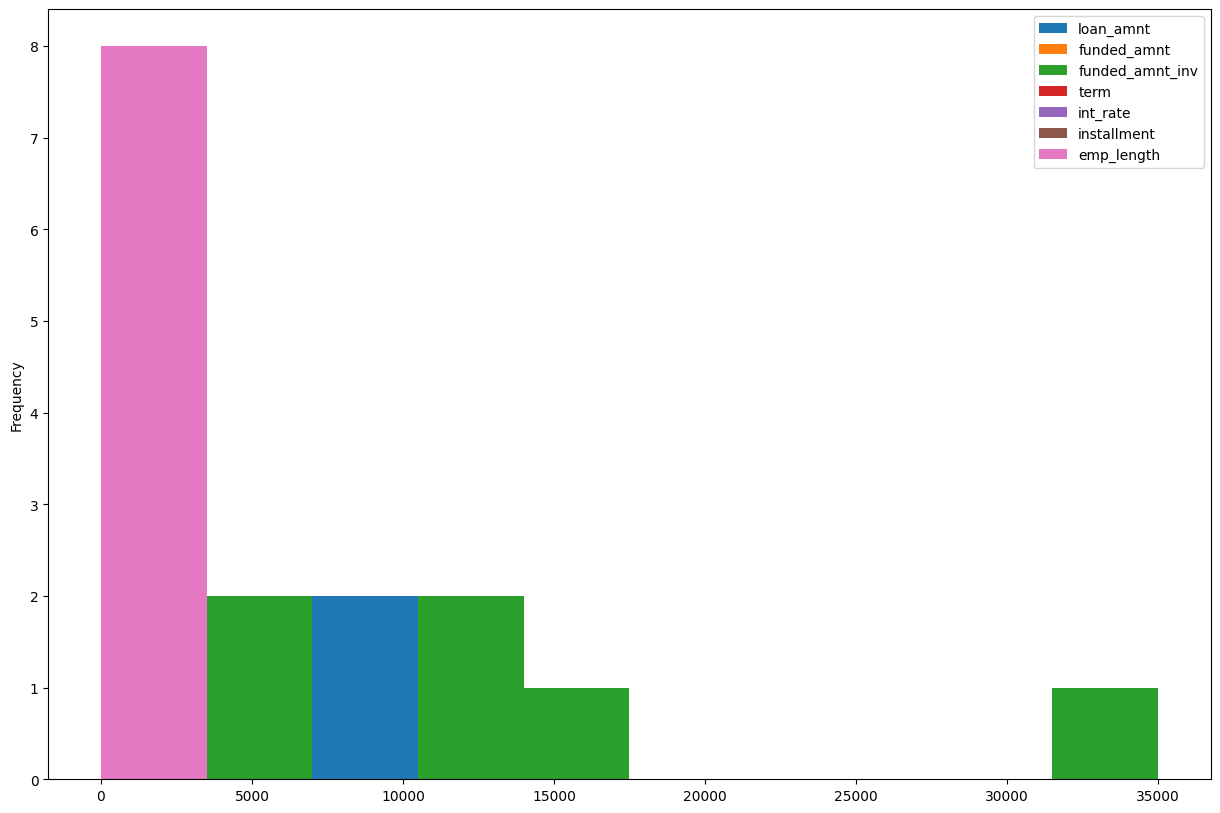

In [114]:

numerical_data.plot(kind='hist', figsize=(15, 10))


For Categorical analysis we will first get the summary of them 

In [115]:
categorical_data = cleaned_data[[
    'grade', 'loan_status', 'emp_title']].describe()
print(categorical_data)


       grade loan_status        emp_title
count    999         999              999
unique     7           5              918
top        B   Excellent  Bank of America
freq     354         729               54


<AxesSubplot:>

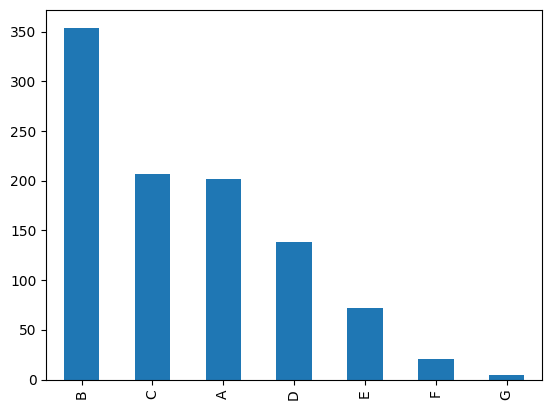

In [116]:
cleaned_data['grade'].value_counts().plot(kind='bar')



The Bar graph shows what is the percentage or count of student who have got their respective grade. 

Bivariate Analysis are best when we have two variables to compare. Here I will be comparing two most important columns I found which are Employee_length which is how much experinced an employer is vs his annual income. This will give us a brief analysis to show that number of years working is directly proportional to annual income

<AxesSubplot:xlabel='annual_inc', ylabel='emp_length'>

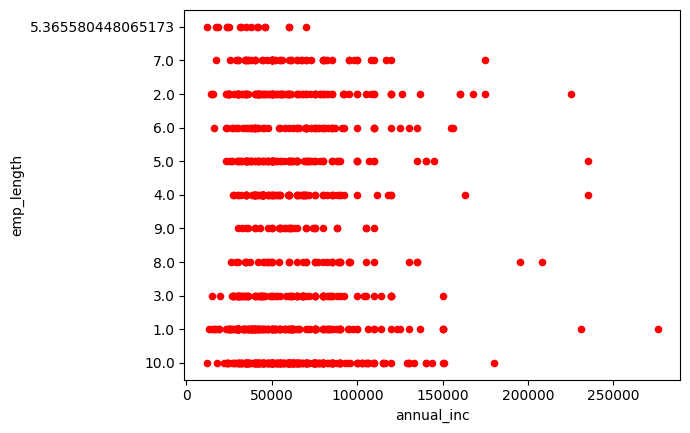

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
cleaned_data['emp_length'] = cleaned_data['emp_length'].astype(str)
cleaned_data.plot.scatter(
    x='annual_inc', y='emp_length', c='red', cmap='viridis')




Discrete vs continous bi-variate analysis. for this I am taking grade and annual income to look and analyze whether grades affect our annual income or not. Through this I will be looking if a person getting higher grade is getting a higher income job or not. 

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

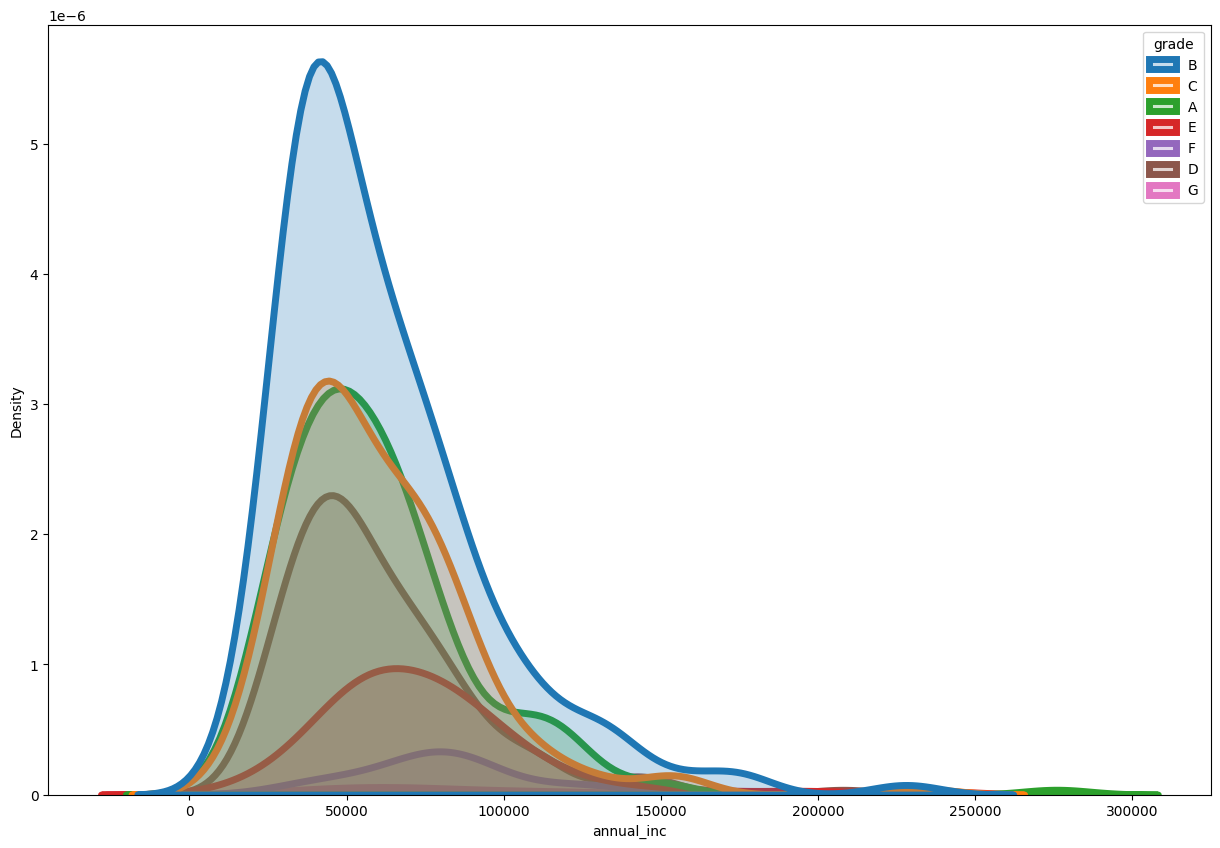

In [146]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=cleaned_data, x='annual_inc', hue='grade', fill=True, linewidth=5)

# Analysis: 
This shows that Majority of poupulated density have got B grafe and are in range of 50000-100000 annual salary while students who have got A grade lie in the highest range of Anuual income. 
There is a mixed review that grades do matter but due to this KDE plot, I can analyze that some students whove have got good grades and other who lie in the C-D grade have almost same annual income job. 

Co-Relation Plot: It is necessary when we want to know the statistical dependency between two random variable. For this analysis I will be using Loan Status to check what factors make a person defaulter. Is it his lower annual income than the loan amout he borrowed, higher intrest or the amount he invested with reliabele term rate. 

In [135]:
corr = cleaned_data.groupby(by='loan_status').agg('mean')[['loan_amnt', 'annual_inc', 'funded_amnt_inv',
                                                       'term', 'int_rate', 'installment']].corr()

corr


,loan_amnt,annual_inc,funded_amnt_inv,term,int_rate,installment
loan_amnt,1.000000,0.303383,0.964687,0.982736,0.967224,0.815621
annual_inc,0.303383,1.000000,0.130086,0.379288,0.076021,-0.120951
funded_amnt_inv,0.964687,0.130086,1.000000,0.903213,0.954870,0.938385
term,0.982736,0.379288,0.903213,1.000000,0.948619,0.700496
int_rate,0.967224,0.076021,0.954870,0.948619,1.000000,0.836562
installment,0.815621,-0.120951,0.938385,0.700496,0.836562,1.000000


From the above Analysis we can see that Those person whose loan status is Excellent has more annual income than the loan they borrowed with a lower intrest rate. 

In [134]:
corr.style.background_gradient(cmap='coolwarm')


,loan_amnt,annual_inc,funded_amnt_inv,term,int_rate,installment
loan_amnt,1.000000,0.303383,0.964687,0.982736,0.967224,0.815621
annual_inc,0.303383,1.000000,0.130086,0.379288,0.076021,-0.120951
funded_amnt_inv,0.964687,0.130086,1.000000,0.903213,0.954870,0.938385
term,0.982736,0.379288,0.903213,1.000000,0.948619,0.700496
int_rate,0.967224,0.076021,0.954870,0.948619,1.000000,0.836562
installment,0.815621,-0.120951,0.938385,0.700496,0.836562,1.000000


# Analysis
As you can see that annual income and installement has negative co-relation which means that if number of installements goes down which means probably person annual income is higher so that he can pay the loan amount more faster. 

Loan amount and term rate has almost positive co-relation close to 1, which means if loan amount is higher than intrest rate will also be higher. 

